In [41]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv(r'train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [45]:
data.shape

(42000, 785)

In [47]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape



In [49]:
Y_train
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
#initialize weights and biases for neurons as random values from -0.5 to 0.5
def init_params():
    W1 = np.random.rand(10, 784) - 0.5  #hidden layer with 10 neurons
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5   #output layer with 10 neuros
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [53]:
#activation functions

def ReLU(Z):
    return np.maximum(0,Z)

def ReLU_deriv(Z):
    return Z > 0
    
def softmax(Z):
    try: 
        A = np.exp(Z) / sum(np.exp(Z))
        return A
    except:
        return 1

In [55]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [57]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [59]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [61]:


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [63]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [65]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.0050, 500)

Iteration:  0
[0 5 7 ... 7 9 7] [1 2 1 ... 6 4 1]
0.08131707317073171
Iteration:  10
[9 5 7 ... 7 9 7] [1 2 1 ... 6 4 1]
0.07639024390243902
Iteration:  20
[9 5 7 ... 7 9 7] [1 2 1 ... 6 4 1]
0.07639024390243902
Iteration:  30
[9 5 7 ... 0 9 3] [1 2 1 ... 6 4 1]
0.07717073170731707
Iteration:  40
[9 5 7 ... 0 9 3] [1 2 1 ... 6 4 1]
0.07921951219512195
Iteration:  50
[9 5 0 ... 0 9 3] [1 2 1 ... 6 4 1]
0.08153658536585366
Iteration:  60
[9 5 0 ... 0 9 3] [1 2 1 ... 6 4 1]
0.08470731707317074
Iteration:  70
[9 5 0 ... 0 9 3] [1 2 1 ... 6 4 1]
0.08751219512195121
Iteration:  80
[9 5 0 ... 0 9 3] [1 2 1 ... 6 4 1]
0.09112195121951219
Iteration:  90
[9 5 0 ... 0 9 3] [1 2 1 ... 6 4 1]
0.09517073170731707
Iteration:  100
[9 0 0 ... 0 9 3] [1 2 1 ... 6 4 1]
0.09897560975609757
Iteration:  110
[9 0 0 ... 0 9 3] [1 2 1 ... 6 4 1]
0.10253658536585365
Iteration:  120
[9 0 0 ... 0 9 3] [1 2 1 ... 6 4 1]
0.1065609756097561
Iteration:  130
[9 0 0 ... 0 9 3] [1 2 1 ... 6 4 1]
0.11041463414634146
Iter

In [67]:
import matplotlib.pyplot as plt
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  1


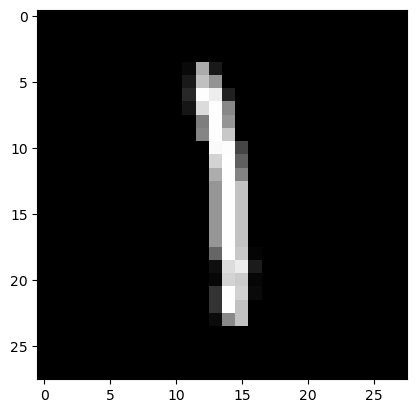

Prediction:  [9]
Label:  2


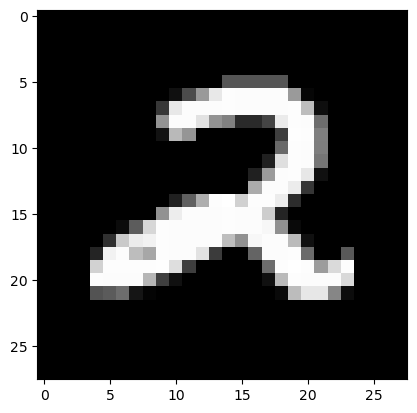

Prediction:  [0]
Label:  1


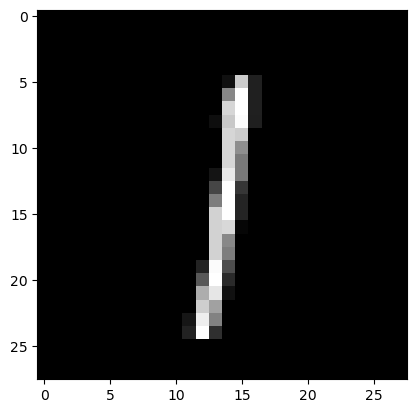

Prediction:  [7]
Label:  0


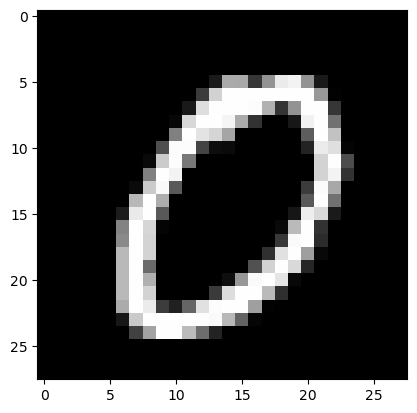

In [69]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [71]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 7 8 0 6 0 4 0 9 9 0 6 0 0 0 0 0 7 7 6 4 0 0 0 7 6 7 0 6 7 6 0 0 0 9 4 0
 9 6 0 7 6 6 0 0 4 9 7 9 0 0 9 4 0 0 9 0 0 0 0 9 6 0 0 9 5 6 6 9 0 9 4 6 0
 9 6 0 0 0 9 6 0 0 0 0 6 0 0 0 6 6 4 1 0 6 0 6 0 4 0 6 4 6 9 0 4 9 0 9 0 4
 1 9 0 4 9 0 0 0 9 0 4 2 0 6 9 0 0 6 7 7 0 7 6 0 0 9 9 0 9 0 0 6 9 7 9 0 0
 0 9 7 9 6 6 9 7 0 9 0 0 0 0 6 0 4 4 9 1 9 0 0 0 7 6 6 0 6 6 9 4 0 7 9 9 6
 7 0 1 4 0 9 0 3 0 0 7 6 4 6 6 9 0 0 9 8 9 5 0 1 6 0 0 7 0 4 9 8 0 9 0 0 9
 4 6 6 7 4 0 6 9 9 0 0 9 7 0 6 5 0 0 0 6 9 7 0 9 0 1 0 6 1 6 5 6 0 0 4 6 9
 1 9 0 7 7 9 6 0 0 0 7 5 4 4 9 4 0 0 0 0 0 0 0 6 6 9 0 0 9 0 4 6 0 9 4 5 0
 6 0 0 0 9 5 0 5 6 6 0 0 9 6 0 9 4 6 0 6 4 0 6 6 7 4 0 0 6 4 5 0 0 0 4 4 0
 6 0 6 0 0 4 4 6 0 6 0 5 4 9 7 0 7 0 6 9 0 6 6 4 8 0 9 9 0 4 0 6 1 6 8 6 0
 0 0 7 9 0 6 0 0 0 0 7 6 7 0 4 0 9 7 4 4 0 6 7 0 4 0 6 6 0 4 5 0 6 9 0 0 7
 6 6 9 0 6 9 0 0 9 0 0 7 0 7 0 6 6 0 9 0 0 6 8 9 3 0 4 0 0 0 0 0 0 4 3 4 6
 6 0 9 6 7 6 9 4 6 0 4 6 0 6 4 6 9 0 8 0 4 0 6 6 6 6 0 0 9 0 7 0 0 9 4 5 7
 1 4 0 6 5 6 0 0 9 9 0 9 

0.225